In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
results
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results)
df = pd.DataFrame(results, columns=['Dt', 'Prcp'])
df.date = pd.to_datetime(df['Dt'])
df.set_index('Dt', inplace=True)
df.sort_values(by='Dt', ascending=False)
df

Query Date:  2016-08-23


<ipython-input-12-17f78aa2297e>:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.date = pd.to_datetime(df['Dt'])


,Prcp
Dt,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


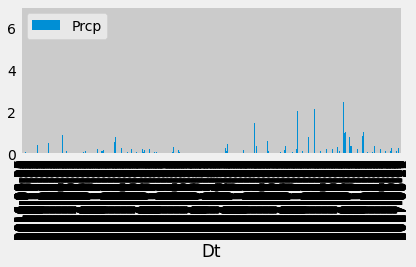

In [13]:
df = pd.DataFrame(results, columns=['Dt','Prcp'])
# plt.subplots(figsize =(10, 7)
df.set_index('Dt', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()
# Use Pandas Plotting with Matplotlib to plot the data

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
station_1 = session.query(Measurement).\
filter(Measurement.station == 'USC00519397').count()
print(station_1)

station_2 = session.query(Measurement).\
filter(Measurement.station == 'USC00513117').count()
print(station_2)

station_3 = session.query(Measurement).\
filter(Measurement.station == 'USC00514830').count()
print(station_3)

station_4 = session.query(Measurement).\
filter(Measurement.station == 'USC00517948').count()
print(station_4)

station_5 = session.query(Measurement).\
filter(Measurement.station == 'USC00518838').count()
print(station_5)

station_6 = session.query(Measurement).\
filter(Measurement.station == 'USC00519523').count()
print(station_6)

station_7 = session.query(Measurement).\
filter(Measurement.station == 'USC00519281').count()
print(station_7)

station_8 = session.query(Measurement).\
filter(Measurement.station == 'USC00511918').count()
print(station_8)

station_9 = session.query(Measurement).\
filter(Measurement.station == 'USC00516128').count()
print(station_9)
# List the stations and the counts in descending order.


2724
2709
2202
1372
511
2669
2772
1979
2612


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_7 = session.query(Measurement).\
filter(Measurement.station == 'USC00519281').count()
print(station_7)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()